# Affine Model with Stochastic Market Price of Risk

The model uses as state variables, 
1. the short-rate $r_t$
2. its own stochastic reversion level $\theta_t$
3. the market-price-of-risk $\lambda_t$

The SDEs are as follows, 

$$
\begin{aligned}
dr_t &= \kappa_{r}\left[\theta_t - r_t\right]dt + \sigma_r dz_t^r\\
d\theta_t &= \kappa_{\theta}\left[\theta^{\infty} - \theta_t\right]dt + \lambda_t^{\theta}\sigma_{\theta}dt+ \sigma_{\theta} dz_t^r\\
d\lambda_t^{\theta} &= \kappa_{\lambda}\left[\lambda^{\infty} - \lambda^{\theta}_t\right]dt + \sigma_{\lambda} dz_t^{\lambda}\\
\end{aligned}
$$

The state variables (in vector form), 

$$
\mathbf{x}_t=\begin{bmatrix} x_t^1 \cr x_t^2 \cr x_t^3 \end{bmatrix} = \begin{bmatrix} \lambda_t^{\theta} \cr \theta_t \cr r_t \end{bmatrix} 
$$

follows the dynamics (in vector form, 

$$
\begin{aligned}
d\mathbf{x}_t &= \mathcal{K}(\pmb{\theta} - \mathbf{x}_t)dt + Sd\mathbf{z}_t\\
d\mathbf{x}_t=\begin{bmatrix} dx_t^1 \cr dx_t^2 \cr dx_t^3 \end{bmatrix} = \begin{bmatrix} \kappa_{\lambda} & 0 & 0\\ -\sigma_{\theta} & \kappa_{\theta} & 0 \\ 0 & -\kappa_r & \kappa_r\end{bmatrix}
\end{aligned}
$$



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pandas.tseries.offsets import MonthEnd
import statsmodels.api as sm

In [6]:
yields_data = pd.read_excel('feds200628.xlsx', sheet_name='Yields', skiprows=1, index_col='Date', parse_dates=True )
yields_data = yields_data.div(100.)
yields_data = yields_data.loc[:, [f'SVENY{x:02d}' for x in range(1, 31)] ]
yields_data = yields_data.dropna(how='any')

<AxesSubplot:xlabel='Date'>

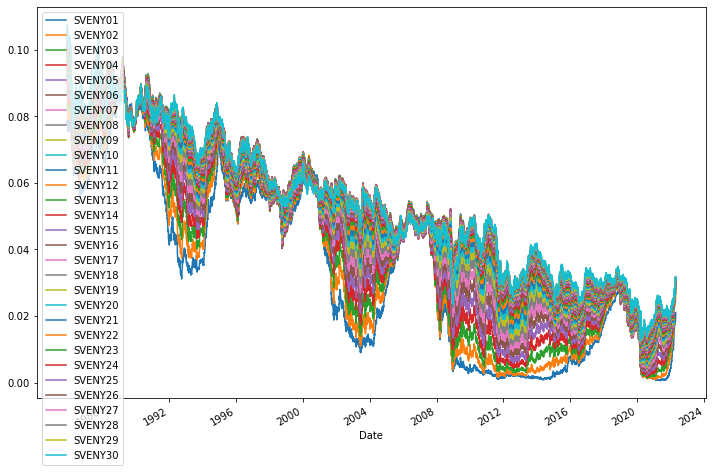

In [7]:
yields_data.plot(figsize=(12, 8))

In [9]:
yield_changes = yields_data.diff()
# yield_changes